## Quick Start Example

This is a brief example designed to be run from the already prepared quick_start file, which just puts together some data columns + a target (age) in the same csv (the python file make_quickstart_file.py).

Our main question of interest is going to be: Can cortical thickness ROIs predict participant age? 

In [1]:
import BPt as bp

As a first step, we will prepare our data into a BPt dataset object (https://sahahn.github.io/BPt/reference/api/BPt.Dataset.html). If you already familiar with the python library pandas, then you might notice that this object looks awfully simmilar to the pandas DataFrame object - and you would be right! The Dataset class is built directly ontop of the DataFrame class, just adding some extra functionality / special behavior for working with the BPt.

In this minimal example, this step will be rather be simple. There are 3 different 'roles' that columns within our Dataset can take. The first 'data' is which by default every loaded column will go into, these are going to be our features that are used to predict some variable of interest (The X variable in a scikit-learn style setup). The second key role is 'target', which are going to be any of our feature(s) which we want to predict (using the columns as input variables). The last is 'non input' which as the name suggests are any variables which we do not want to ever use directly as an input / data variable. 

In [2]:
# Load data from csv to Dataset directly - we specify the file path and which column
# we want to be in  the index
data = bp.read_csv('quick_start.csv', index_col='participant_id')

# Specify which column is our target variable
data = data.set_target('age')

# Set sex as non-input, and as binary variable
data = data.set_non_input('sex').to_binary('sex')
data.head() # Just show the first 5 rows

lh_G&S_frontomargin_thickness  lh_G&S_occipital_inf_thickness  \
participant_id                                                                  
sub-0001                                1.925                           2.517   
sub-0002                                2.405                           2.340   
sub-0003                                2.477                           2.041   
sub-0004                                2.179                           2.137   
sub-0005                                2.483                           2.438   

                lh_G&S_paracentral_thickness  lh_G&S_subcentral_thickness  \
participant_id                                                              
sub-0001                               2.266                        2.636   
sub-0002                               2.400                        2.849   
sub-0003                               2.255                        2.648   
sub-0004                               2.366                        2.885   
sub-0005                               2.219                        2.832   

                lh_G&S_transv_frontopol_thickness  \
participant_id                                      
sub-0001                                    2.600   
sub-0002                                    2.724   
sub-0003                                    2.616   
sub-0004                                    2.736   
sub-0005                                    2.686   

                lh_G&S_cingul-Ant_thickness  lh_G&S_cingul-Mid-Ant_thickness  \
participant_id                                                                 
sub-0001                              2.777                            2.606   
sub-0002                              2.888                            2.658   
sub-0003                              2.855                            2.924   
sub-0004                              2.968                            2.576   
sub-0005                              3.397                            2.985   

                lh_G&S_cingul-Mid-Post_thickness  \
participant_id                                     
sub-0001                                   2.736   
sub-0002                                   2.493   
sub-0003                                   2.632   
sub-0004                                   2.593   
sub-0005                                   2.585   

                lh_G_cingul-Post-dorsal_thickness  \
participant_id                                      
sub-0001                                    2.956   
sub-0002                                    3.202   
sub-0003                                    2.984   
sub-0004                                    3.211   
sub-0005                                    3.028   

                lh_G_cingul-Post-ventral_thickness  ...  \
participant_id                                      ...   
sub-0001                                     2.925  ...   
sub-0002                                     2.868  ...   
sub-0003                                     2.972  ...   
sub-0004                                     2.428  ...   
sub-0005                                     3.361  ...   

                rh_S_postcentral_thickness  \
participant_id                               
sub-0001                             2.038   
sub-0002                             1.882   
sub-0003                             2.066   
sub-0004                             1.930   
sub-0005                             1.938   

                rh_S_precentral-inf-part_thickness  \
participant_id                                       
sub-0001                                     2.425   
sub-0002                                     2.513   
sub-0003                                     2.410   
sub-0004                                     2.241   
sub-0005                                     2.445   

                rh_S_precentral-sup-part_thickness  rh_S_suborbital_thickness  \
participant_id                           

We can visualize any variable easily w/ built in plotting functions. 

age: 224 rows


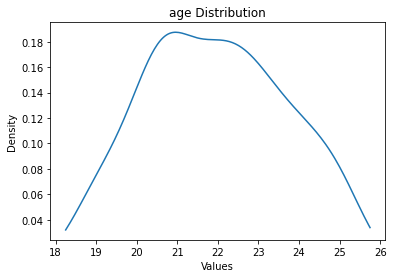

lh_G&S_cingul-Ant_thickness: 224 rows


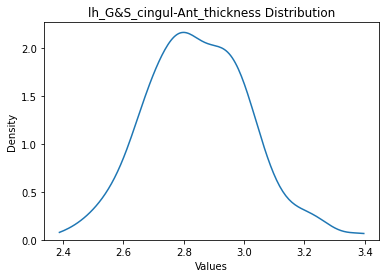

sex: 224 rows


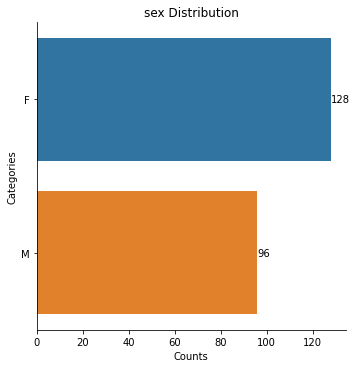

In [3]:
# Plot a single variables distribution at a time
data.plot(scope=['age', 'sex', 'lh_G&S_cingul-Ant_thickness'])

sex: 224 rows
age: 224 rows
Plotting 224 overlap valid subjects.


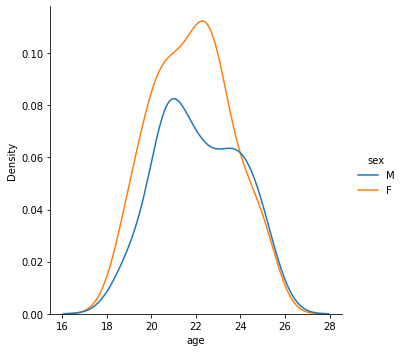

In [4]:
# Or we can specify that we want to look at a bi-variate plot            
data.plot_bivar('age', 'sex')

Next, we will jump in directly to a minimal machine learning example. In this case, our question of interest is can our thickness ROIs predict age, which we have already setup within our dataset by virtue of specifying all cortical thickness ROI's as role='data' and age with role='target'.

To run the experiment itself, we are going to use the `evaluate` method from BPt. This method allows us to perform a number of different ML evaluations and can be customized according a large number of different parameters. In this case though, we are going to provide the bare minimum input needed, and let the default settings take care of everything else.

In particular, we specify that we want to use a default ML pipeline from BPt called 'ridge_pipe' which is pre-defined pipeline based on a regularized ridge regressor w/ nested hyper-parameter search, and also we let the function know our dataset.

In [5]:
results = bp.evaluate(pipeline='ridge_pipe', dataset=data)

Predicting target = age
Using problem_type = regression
Using scope = all (defining a total of 148 features).
Evaluating 224 total data points.


Folds:   0%|          | 0/5 [00:00<?, ?it/s]


Training Set: (179, 148)
Validation Set: (45, 148)
Fit fold in 2.7 seconds.
explained_variance: 0.1786
neg_mean_squared_error: -3.17

Training Set: (179, 148)
Validation Set: (45, 148)
Fit fold in 2.1 seconds.
explained_variance: 0.1446
neg_mean_squared_error: -2.19

Training Set: (179, 148)
Validation Set: (45, 148)
Fit fold in 2.2 seconds.
explained_variance: 0.1142
neg_mean_squared_error: -3.44

Training Set: (179, 148)
Validation Set: (45, 148)
Fit fold in 2.3 seconds.
explained_variance: 0.1005
neg_mean_squared_error: -2.66

Training Set: (180, 148)
Validation Set: (44, 148)
Fit fold in 2.0 seconds.
explained_variance: 0.0243
neg_mean_squared_error: -2.65



We can see from the verbose output above that 5 different Training and Validation set's were evaluated. This is because the default cross-validation behavior is to run a K-Fold cross validation with 5 folds.

Next, let's look at the returned results object which we saved in variable `results`. 

In [6]:
results

EvalResults
------------
explained_variance: 0.1124 ± 0.0516
neg_mean_squared_error: -2.82 ± 0.4357

Saved Attributes: ['estimators', 'preds', 'timing', 'estimator', 'train_subjects', 'val_subjects', 'feat_names', 'ps', 'mean_scores', 'std_scores', 'weighted_mean_scores', 'scores', 'fis_', 'coef_', 'cv']

Avaliable Methods: ['to_pickle', 'compare', 'get_X_transform_df', 'get_inverse_fis', 'get_preds_dfs', 'subset_by', 'get_fis', 'get_coef_', 'permutation_importance']

Evaluated With:
target: age
problem_type: regression
scope: all
subjects: all
random_state: 1


This object saves by default a large amount of potentially useful information from the expiriment. This includes the mean evaluation metrics, actual estimator objects, predictions made, information on feature importance and more. 

Let's say we want to look at feature importances. Because the model we ran was a regularized ridge regression, the importances we are going to be looking at are the beta weights from  the model. Further, because we ran a 5-fold CV, we want to look at the beta weights as averaged across each of our 5 models:

In [7]:
fis = results.get_fis(mean=True)
fis

lh_G&S_cingul-Ant_thickness           0.035434
lh_G&S_cingul-Mid-Ant_thickness      -0.117493
lh_G&S_cingul-Mid-Post_thickness     -0.104482
lh_G&S_frontomargin_thickness         0.021461
lh_G&S_occipital_inf_thickness       -0.006280
                                        ...   
rh_S_suborbital_thickness            -0.036355
rh_S_subparietal_thickness           -0.020749
rh_S_temporal_inf_thickness           0.021025
rh_S_temporal_sup_thickness          -0.003753
rh_S_temporal_transverse_thickness   -0.070986
Length: 148, dtype: float32

Next, let's plot our results. For this, we will use an "auto-magical" plotting function from the library neurotools (designed to compliment BPt).

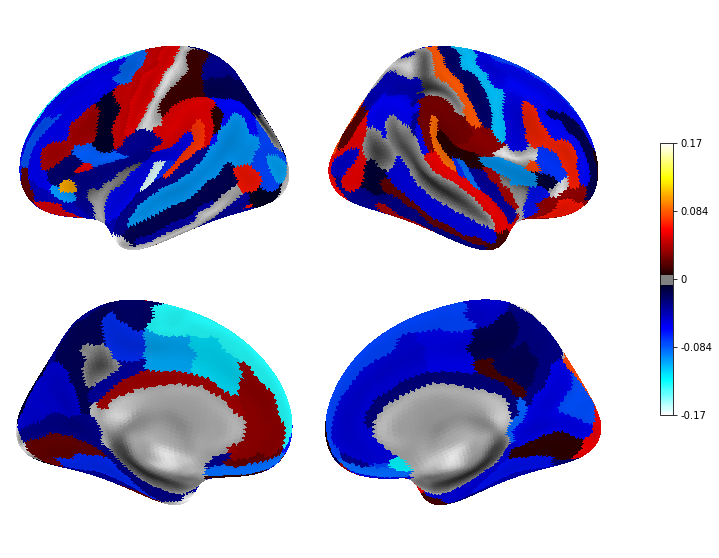

In [8]:
from neurotools.plotting import plot
plot(fis)

This plotting function tries to basically automate everything.  This includes, as an important caveat, an automatic conversion from ROI names to their associated parcellation - which for now only supports a small number of underlying parcellations, including of course our current freesurfer based destr. parcellation.

Next, we will plot the same feature importances again, but this time go a little further to add some customization. We will customize here  by adding a user-defined threshold in which to not show results under, a title and lastly specify that we want to plot results in a higher resolution surface space (rather than the auto-detected one). We will also save the figure with matplotlib

In [ ]:
import matplotlib.pyplot as plt

plot(fis,
     threshold=.1,
     title='Predict Age - Avg. Beta Weights',
     space='fsaverage')

plt.savefig('example.png', dpi=100)

Not too bad right? Putting everything together we can perform a full analyses in just a few lines of code

```
# Load data
data = bp.read_csv('quick_start.csv', index_col='participant_id')

# Set structure
data = data.set_target('age').set_non_input('sex').to_binary('sex')

# Evaluate w/ ML
results = bp.evaluate(pipeline='ridge_pipe', dataset=data)

# Plot average beta weight
plot(results.get_fis(mean=True))

```

For the rest of this notebook we will take a bit of a deeper dive into some of the other features / options avaliable in BPt.

Again referring to the BPtEvaluator object, we have a number of things to look at, including the estimator, e.g., what did we even run? 

In [ ]:
results.estimator

Yikes, thats a handful... another way of looking at the pipeline we ran is to look at it in the BPt pipeline object syntax rather than the raw scikit-learn style.

In [ ]:
from BPt.default.pipelines import ridge_pipe

ridge_pipe

There are of course other useful things we can do with this results object. One useful one is to be able to easily run permutation tests as a way of estimating the signifigance of our results.

In [ ]:
p_values, null_dist_means, null_dist_stds = results.run_permutation_test(n_perm=10)
p_values, null_dist_means, null_dist_stds

While this  is useful, it actually be a lot more powerful extend the permutations to try and test for certain assumptions. For example, we will re-run another 10 permutations, but this time we will specify that values within the target only be allowed to be swapped with other participants of the same sex. Now what we are testing in a more specific null model, one where any potential sex-age effects will be preserved within our null distribution. In this version we are essentially testing to see if sex effects are driving our observed R2. If the null dist mean is still the same as before, it is likely not, but if it is higher, than to some degree it might be. This strategy is great for multi-site data in particular.  

In [ ]:
p_values, null_dist_means, null_dist_stds = results.run_permutation_test(n_perm=10, blocks=data['sex'])
p_values, null_dist_means, null_dist_stds

As careful user might note that in this case a number of these steps are actually redundant, e.g., we have no missing data, so no need for imputation and we have no categorical data, so no need for one hot encoding. The beauty here is that if not needed, or if out of scope given a certain input, these pipeline steps are just skipped. This is helpful for designing re-usable pipelines for different inputs!

The other thing to note is that all of the BPt style objects when possible are generic to problem type also. So that means, even if we switch to a binary prediction, we can still use the same code from the ridge pipe. Let's try that now:

In [ ]:
# Change sex to a target
data = data.set_role('sex', 'target')

# We can pass either the default str, or the object itself for pipeline
# Also note that  now that we have 2 targets, we need to specify which one we want to predict
# Let's also add one more parameter, n_jobs, which let's use  multi-process our evaluation
results = bp.evaluate(pipeline=ridge_pipe, 
                      dataset=data,
                      target='sex',
                      n_jobs=4)                     
results                     

Now if we look at the fully composed scikit-learn style estimator again:

In [ ]:
results.estimator

We see that there are some changes from before, e.g., now our base model is a LogisticRegression and the set of parameters it searches over are different

```
param_distributions={'C': Log(lower=1e-05, upper=1000.0), 'class_weight': TransitionChoice([None, 'balanced'])}
```

Where before the default hyper-parameter search parameters were:

```
param_distributions={'alpha': Log(lower=0.001, upper=100000.0)}
```

On the end of the user, specifying these hyper-parameter distributions is done when building the model as just:
```Model(obj='ridge', params=1, ...)```

Where 1 refers which default distribution to select (see all choices for all supported models here: https://sahahn.github.io/BPt/options/pipeline_options/models.html). 

A more advanced used could also manually specify this choice as well, for example:

In [ ]:
# Make a copy of the default ridge pipeline
our_ridge_pipe = ridge_pipe.copy()

# Look in our pipeline at where the param distribution is saved
our_ridge_pipe.steps[-1].params

In [ ]:
# Replace it with one of our choosing
our_ridge_pipe.steps[-1].params = {'C': bp.p.Log(lower=1, upper=100)}

results = bp.evaluate(pipeline=our_ridge_pipe, 
                      dataset=data,
                      target='sex',
                      n_jobs=4)                     
results                     

Something to keep in mind of course when performing custom hyper-parameter tuning like this is not to abuse it, re-running different choices until by chance you get a high performing results.

We can also just as easily use custom sklearn objects as either a step in the pipeline or instead of the pipeline.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# We just need to wrap it in a Model object, so BPt
# knows how to handle it correctly
sk_model = bp.Model(LogisticRegressionCV())

# This model ends up printing like a hundred ConvergenceWarnings
# so note that we can mute this warnings
results = bp.evaluate(pipeline=sk_model, 
                      dataset=data,
                      target='sex',
                      mute_warnings=True)                  
results           